<h1>Bogota Traffic Accidents</h1>
<h2>Overview</h2>
<p>The objective of this exercise is to run an analysis about the traffic accidents in Bogota city since June 2015 till May 2022. The data used here comes from <a href="https://datosabiertos.bogota.gov.co/dataset/siniestros-viales-consolidados-bogota-d-c">Datos Abiertos Bogota</a>.</p>

<h2>Exploratory Data Analysis (EDA)</h2>
<ul>
    <li>Get a bird's eye view of the data, checking the internal status of the csv (columns, null, mean, std)</li>
    <li>Here's what we can easily see:</li>
    <ol>
        <li>There are timestamps and they are also categorized.</li>
        <li>The day of the week is categorized against the timestamp.</li>
        <li>The timestamp is the date of the accident, so the location is categorized.</li>
        <li>For locations, we can assume that X and Y are latitudes and longitudes.</li>
    </ol>
    <li>Visualization that may be possible:</li>
    <ol>
        <li>Normal visualization (Visualization) plot.</li>
        <li>Visualization of a map, which can be used to visualize in which "localidad" accidents occurs most often.</li>
    </ol>
    <li>Visualization is used only for gaining knowledge, and methodological interpretations, such as improving the accuracy of Feature Engineering.</li>
</ul>

In [39]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import pyplot
from scipy import stats

%matplotlib inline

In [2]:
# Reading data

dfBogotaAccidents = pd.read_csv('../oscarBogotaAccidentesTransito/csvFiles/Siniestros_Viales_Bogota_Accidente.csv')

C:\Users\olanc\AppData\Local\Temp\ipykernel_328\714545266.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  dfBogotaAccidents = pd.read_csv('../oscarBogotaAccidentesTransito/csvFiles/Siniestros_Viales_Bogota_Accidente.csv')


In [4]:
# Verify the number of columns and rows

dfBogotaAccidents.shape

(221909, 18)

In [6]:
# Seeing the header

dfBogotaAccidents.head(3).style.background_gradient(cmap='mako_r', text_color_threshold=0.02)

In [7]:
# Describe data

dfBogotaAccidents.describe().style.background_gradient(cmap='mako_r', text_color_threshold=0.02)

In [8]:
# Recognize the Data Type

dfBogotaAccidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221909 entries, 0 to 221908
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    221909 non-null  float64
 1   Y                    221909 non-null  float64
 2   OBJECTID             221909 non-null  int64  
 3   FORMULARIO           221909 non-null  object 
 4   CODIGO_ACCIDENTE     221909 non-null  int64  
 5   HORA_OCURRENCIA_ACC  221909 non-null  object 
 6   ANO_OCURRENCIA_ACC   221909 non-null  int64  
 7   MES_OCURRENCIA_ACC   221909 non-null  object 
 8   DIA_OCURRENCIA_ACC   221909 non-null  object 
 9   GRAVEDAD             221909 non-null  object 
 10  CLASE_ACC            221909 non-null  object 
 11  LOCALIDAD            221863 non-null  object 
 12  FECHA_HORA_ACC       149500 non-null  object 
 13  LATITUD              221909 non-null  float64
 14  LONGITUD             221909 non-null  float64
 15  CIV              

In [9]:
# Checking for nulls

dfBogotaAccidents.isnull().sum()

X                          0
Y                          0
OBJECTID                   0
FORMULARIO                 0
CODIGO_ACCIDENTE           0
HORA_OCURRENCIA_ACC        0
ANO_OCURRENCIA_ACC         0
MES_OCURRENCIA_ACC         0
DIA_OCURRENCIA_ACC         0
GRAVEDAD                   0
CLASE_ACC                  0
LOCALIDAD                 46
FECHA_HORA_ACC         72409
LATITUD                    0
LONGITUD                   0
CIV                     1827
PK_CALZADA             60737
FECHA                      0
dtype: int64

<h4>Comments</h4>
<p>The following attributes have some nulls or empty cells:</p>
<ul>
    <li>Localidad has 46 nulls</li>
    <li>Fecha_Hora_Acc has 72409 nulls</li>
    <li>CIV has 1827 nulls</li>
    <li>PK_Calzada has 60737 nulls</li>
</ul>
<p>The EDA analysis will help us to determine if those attributes are important or has a relevant role during the data analysis, if so, we have to run some data processing.</p>

<h3>Unique</h3>

In [10]:
dfBogotaAccidents.head(3).style.background_gradient(
    cmap='mako_r', text_color_threshold=0.02)


In [16]:
dfBogotaAccidents['LOCALIDAD'].unique()

array(['USAQUEN', 'CHAPINERO', 'BARRIOS UNIDOS', 'SUBA', 'TEUSAQUILLO',
       'KENNEDY', 'FONTIBON', 'LOS MARTIRES', 'ENGATIVA', 'USME',
       'PUENTE ARANDA', 'CIUDAD BOLIVAR', 'RAFAEL URIBE URIBE',
       'ANTONIO NARINO', 'BOSA', 'SAN CRISTOBAL', 'CANDELARIA',
       'TUNJUELITO', 'SANTA FE', nan, 'SUMAPAZ'], dtype=object)

In [28]:
# Amount of accidents per localidad

freqLocalidad = dfBogotaAccidents['LOCALIDAD'].value_counts()
print(freqLocalidad)


KENNEDY               26694
ENGATIVA              23496
SUBA                  21292
USAQUEN               20888
FONTIBON              18269
PUENTE ARANDA         15706
CHAPINERO             12721
TEUSAQUILLO           11268
BARRIOS UNIDOS        11152
BOSA                  10534
CIUDAD BOLIVAR         8959
LOS MARTIRES           7022
RAFAEL URIBE URIBE     6120
SAN CRISTOBAL          6066
SANTA FE               6045
TUNJUELITO             5971
USME                   4508
ANTONIO NARINO         4127
CANDELARIA             1017
SUMAPAZ                   8
Name: LOCALIDAD, dtype: int64


In [27]:
dfBogotaAccidents['GRAVEDAD'].unique()

array(['SOLO DANOS', 'CON HERIDOS', 'CON MUERTOS'], dtype=object)

In [30]:
# Accident severity

freqGravedad = dfBogotaAccidents['GRAVEDAD'].value_counts()
print(freqGravedad)

SOLO DANOS     141721
CON HERIDOS     76588
CON MUERTOS      3600
Name: GRAVEDAD, dtype: int64


In [33]:
# Kind of accident

dfBogotaAccidents['CLASE_ACC'].unique()

array(['CHOQUE', 'ATROPELLO', 'VOLCAMIENTO', 'OTRO', 'CAIDA DE OCUPANTE',
       'AUTOLESION', 'INCENDIO'], dtype=object)

In [35]:
freqClaseAcc = dfBogotaAccidents['CLASE_ACC'].value_counts()
print(freqClaseAcc)

CHOQUE               190511
ATROPELLO             22179
CAIDA DE OCUPANTE      5141
VOLCAMIENTO            3098
OTRO                    944
INCENDIO                 26
AUTOLESION               10
Name: CLASE_ACC, dtype: int64


In [31]:
dfBogotaAccidents['FECHA'].unique()

array(['10/11/2020', '25/06/2015', '11/02/2017', ..., '8/05/2022',
       '23/05/2022', '7/05/2022'], dtype=object)

In [32]:
freqFecha = dfBogotaAccidents['FECHA'].value_counts()
print(freqFecha)

6/12/2019     155
7/12/2021     152
8/11/2016     147
27/10/2017    143
11/05/2018    141
             ... 
12/04/2020      7
25/03/2020      7
23/03/2020      5
10/04/2020      5
21/03/2020      3
Name: FECHA, Length: 2708, dtype: int64


In [36]:
dfBogotaAccidents.iloc[1]

X                                  -74.056376
Y                                    4.689591
OBJECTID                                    2
FORMULARIO                              A8472
CODIGO_ACCIDENTE                      4416604
HORA_OCURRENCIA_ACC                  08:40:00
ANO_OCURRENCIA_ACC                       2015
MES_OCURRENCIA_ACC                      JUNIO
DIA_OCURRENCIA_ACC                     JUEVES
GRAVEDAD                           SOLO DANOS
CLASE_ACC                              CHOQUE
LOCALIDAD                             USAQUEN
FECHA_HORA_ACC         2015/06/25 08:40:00+00
LATITUD                              4.689591
LONGITUD                           -74.056376
CIV                                 1005501.0
PK_CALZADA                            51969.0
FECHA                              25/06/2015
Name: 1, dtype: object

<h3>Visualization</h3>


In [42]:
def visualization_accident(value, tight=False):
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(1, 1, figsize=(19, 6))
        sns.histplot(x=value, data=dfBogotaAccidents, kde=True, palette='rocket', ax=ax)
        ax.tick_params(axis='x', rotation=90)
        if tight == True:
            fig.tight_layout()

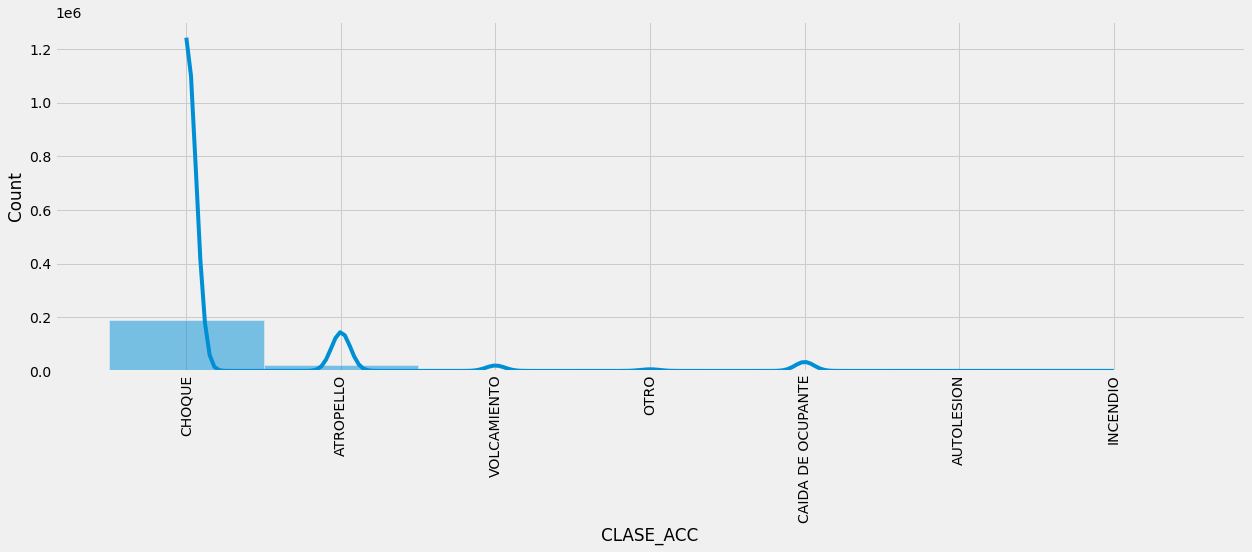

In [44]:
visualization_accident('CLASE_ACC')

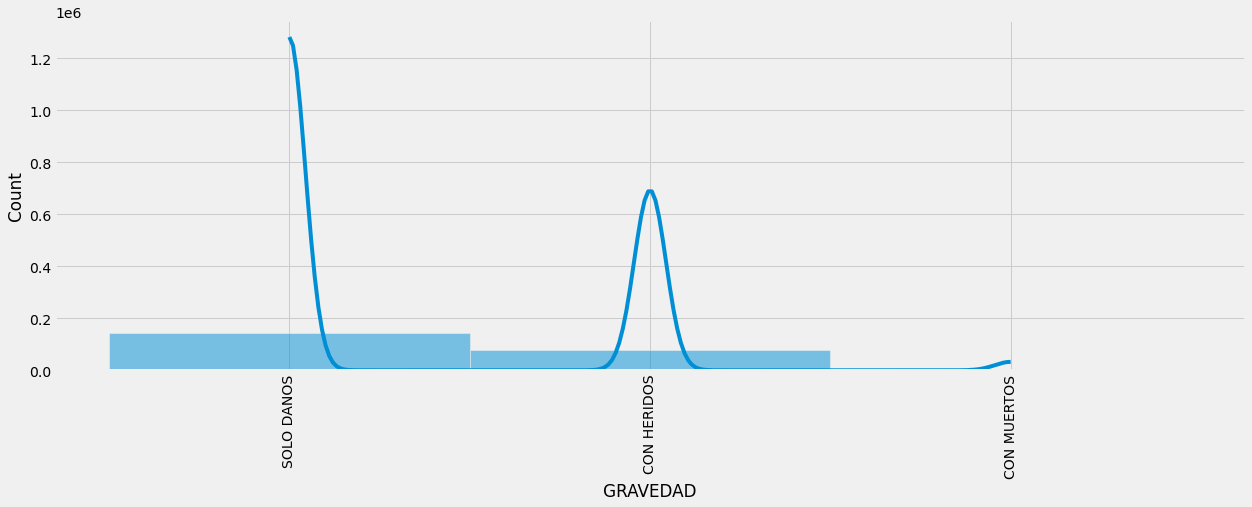

In [45]:
visualization_accident('GRAVEDAD')


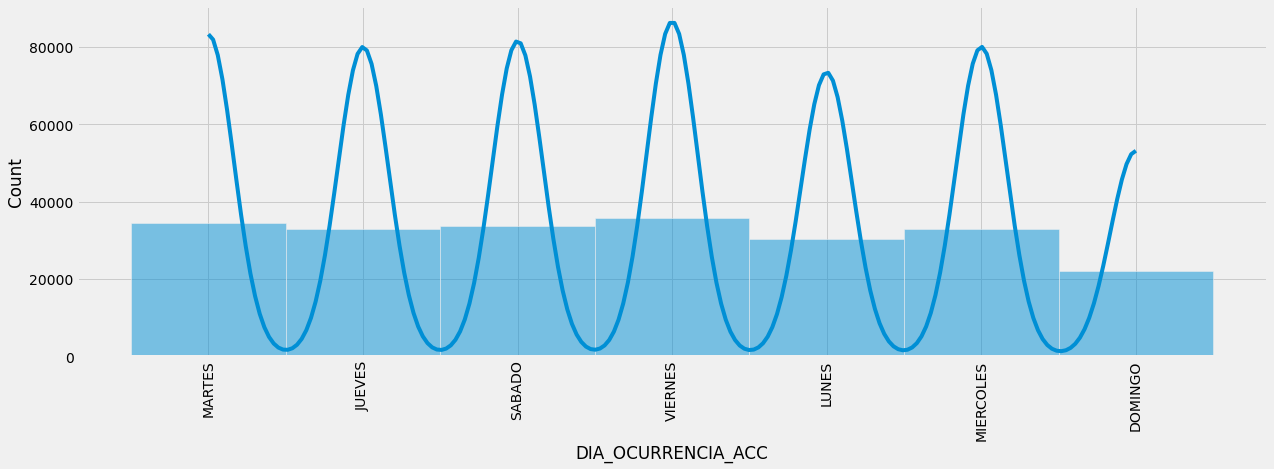

In [46]:
visualization_accident('DIA_OCURRENCIA_ACC')


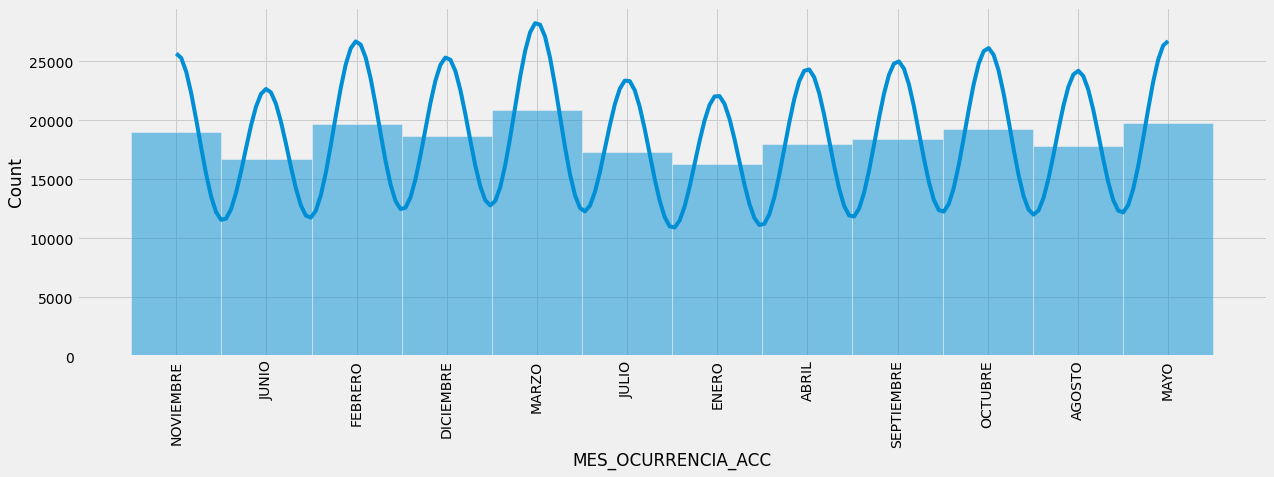

In [48]:
visualization_accident('MES_OCURRENCIA_ACC')


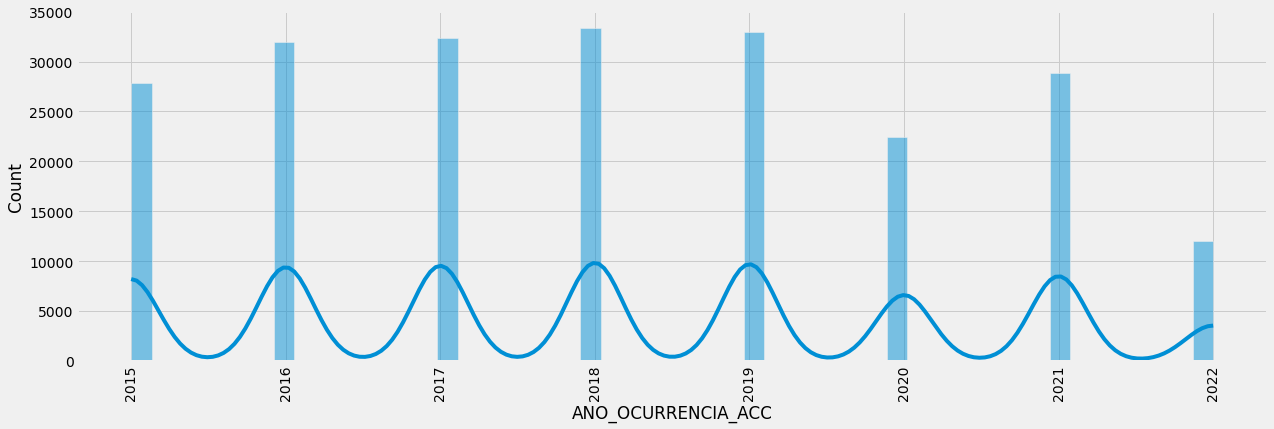

In [96]:
visualization_accident('ANO_OCURRENCIA_ACC')


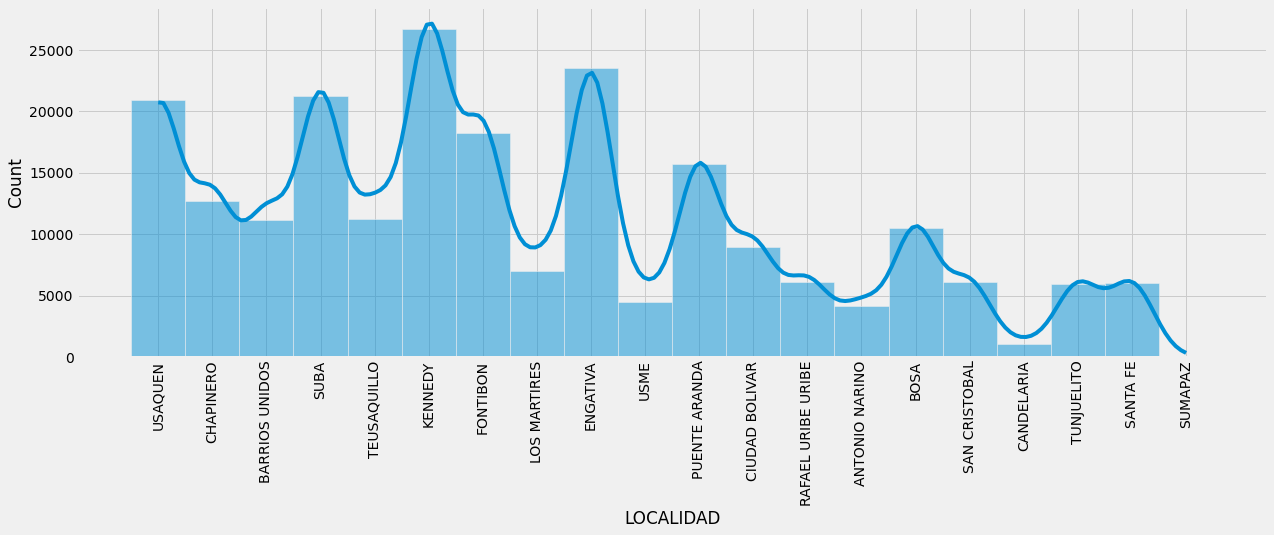

In [47]:
visualization_accident('LOCALIDAD')


<h3>Latitude and longitude scatter chart</h3>
<p>Since the latitude and longitude information exists, it is visualized as a scatter plot. So...</p>
<ol>
    <li>In this way, the shape of the scatter plot displays the shape of the city. This will become visually clearer as the number of data increases.</li>
    <li>What we can see here is that the Latitude and Longitude of the data clearly show the coordinates and are accurate.</li>
    <li>The following scatter plot shows the location of the accidents. The following scatterplot is based on ALL, to make it clear whether the data is actual latitude and longitude.</li>
</ol>

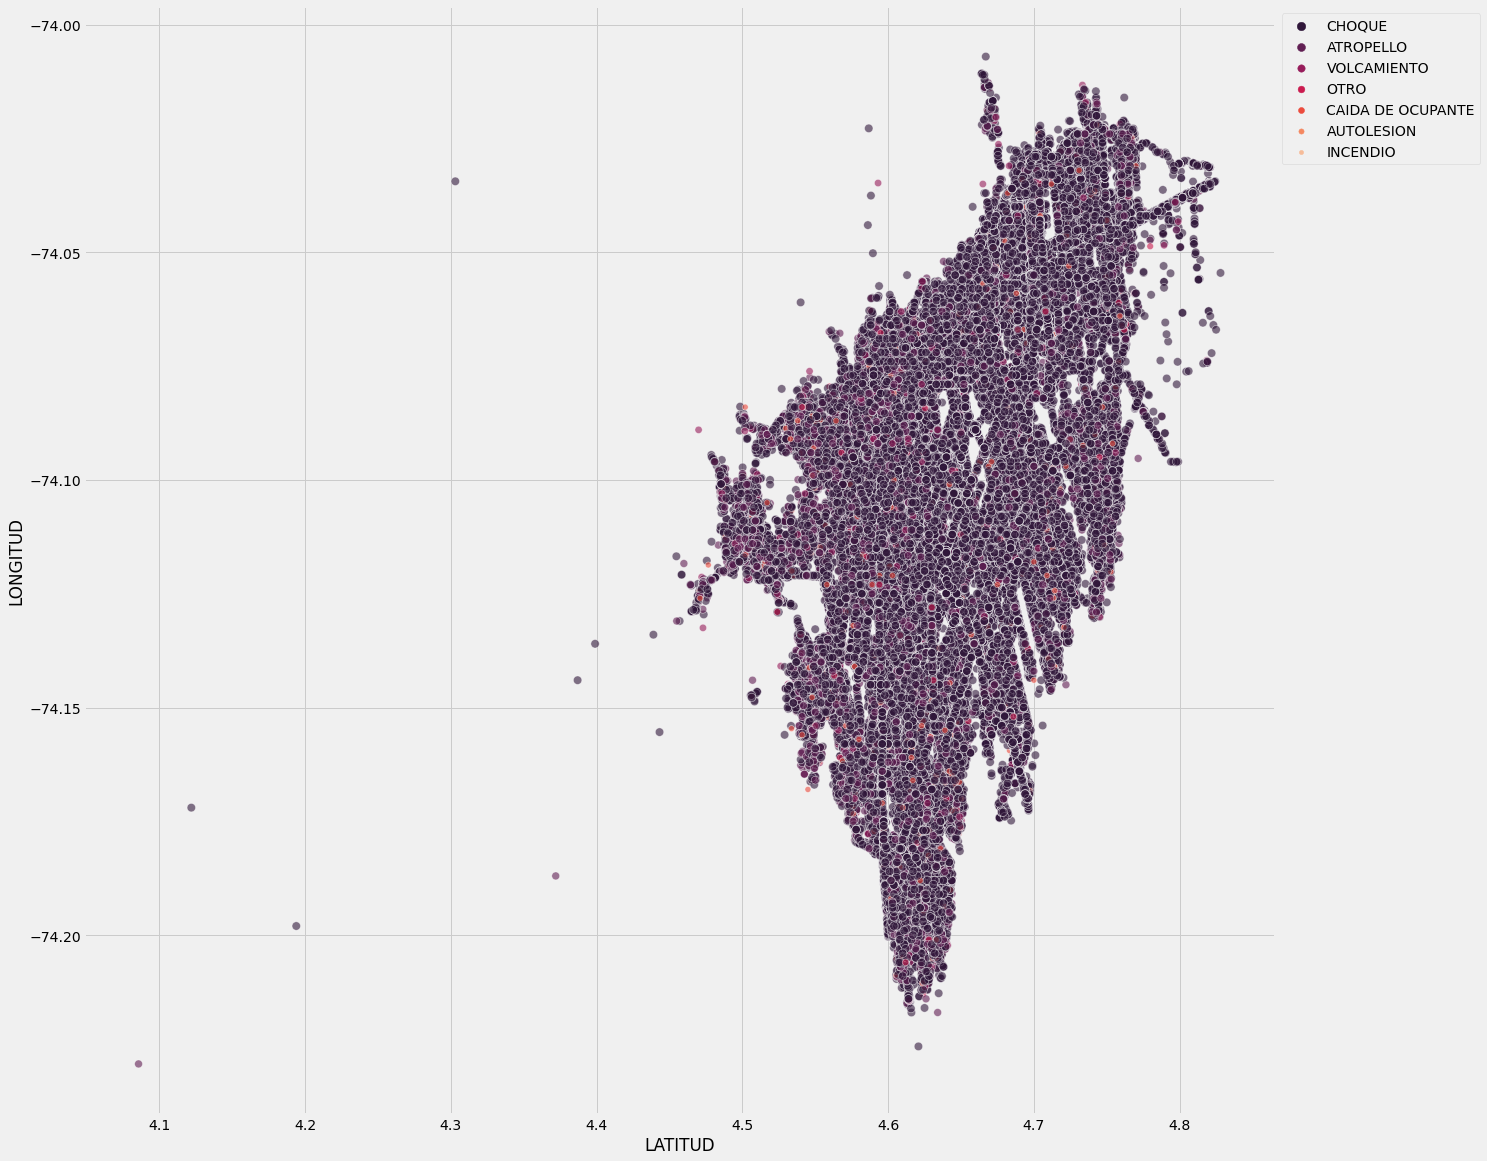

In [54]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(19, 19))
    sns.scatterplot(data=dfBogotaAccidents.iloc[:250000], x='LATITUD', y='LONGITUD', alpha=0.6,
                    palette='rocket', hue='CLASE_ACC', size='CLASE_ACC')  # 878049
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')


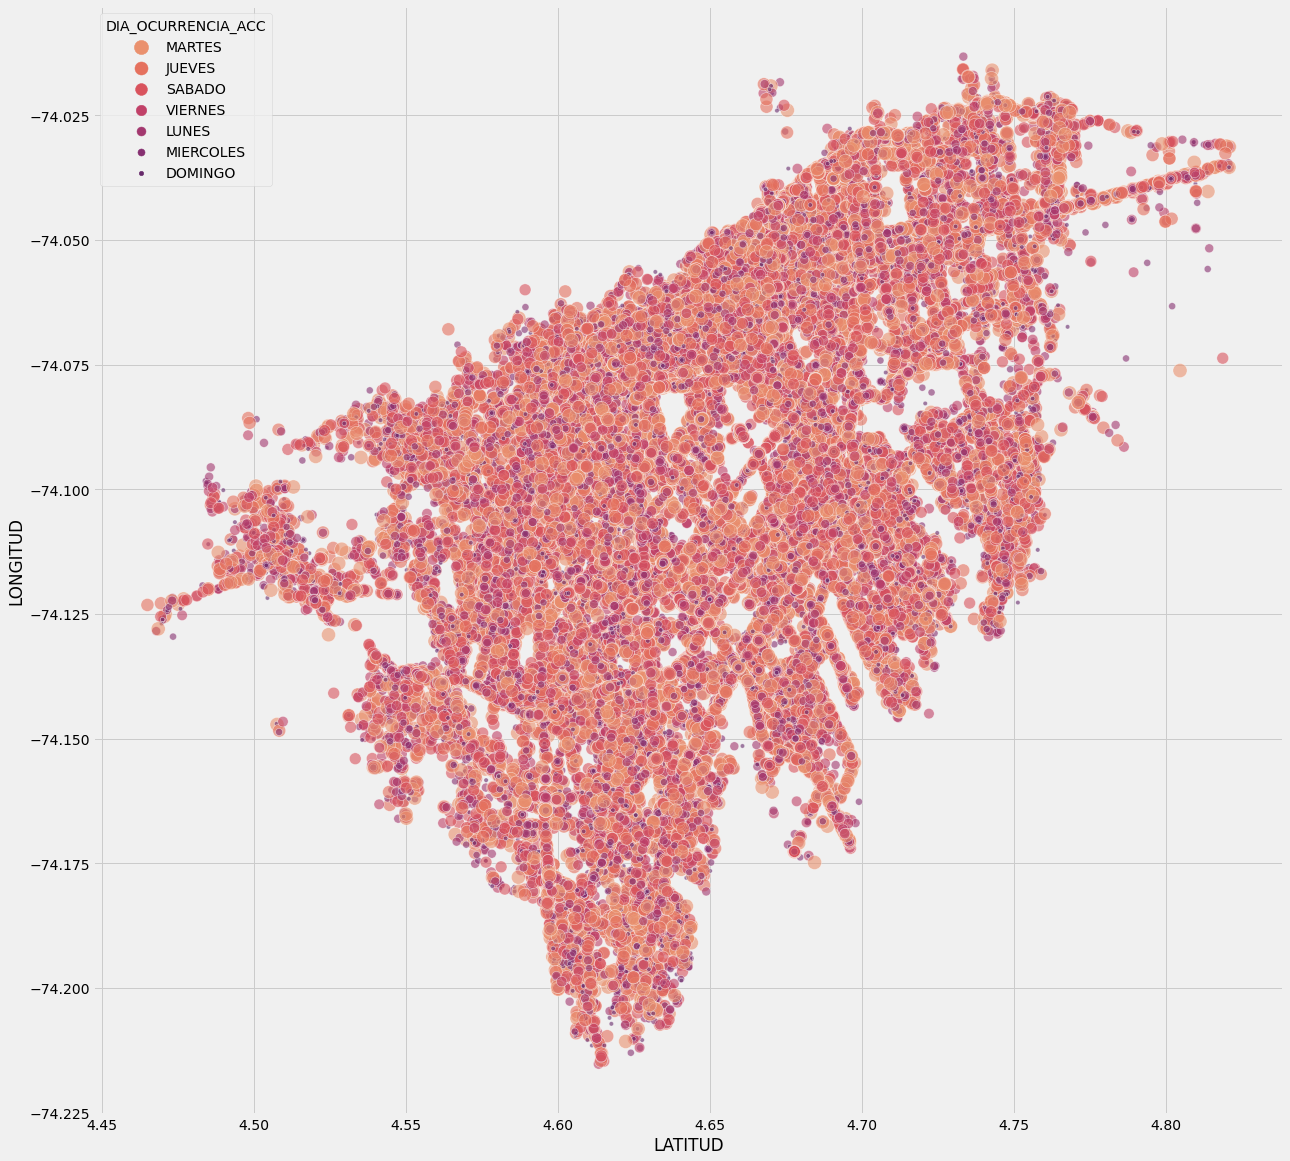

In [65]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(19, 19))
    sns.scatterplot(data=dfBogotaAccidents.iloc[:80000], x='LATITUD', y='LONGITUD', alpha=0.6, palette='flare', hue='DIA_OCURRENCIA_ACC',
                    size='DIA_OCURRENCIA_ACC', sizes=(20, 200), markers=True)


<h3>Folium</h3>
<p><b>folium</b> makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map. For more information visit: <a href="http://python-visualization.github.io/folium/index.html">Folium</a></p>

<h4>Heat Map</h4>
<ul>
    <li>The pandas query is used to speed up the process (actually, Numexpr) and to display the heatmap of the data according to multiple conditions.</li>
    <li>The query, for example, helps us to visualize the type of accident and its severity over all city. However, we can restrict more the query and visualize according to the "localidad".</li>
</ul>

In [68]:
import folium
from folium.plugins import HeatMap

In [98]:
# Type of Injury
print(freqClaseAcc)

CHOQUE               190511
ATROPELLO             22179
CAIDA DE OCUPANTE      5141
VOLCAMIENTO            3098
OTRO                    944
INCENDIO                 26
AUTOLESION               10
Name: CLASE_ACC, dtype: int64


In [99]:
# Severity
print(freqGravedad)


SOLO DANOS     141721
CON HERIDOS     76588
CON MUERTOS      3600
Name: GRAVEDAD, dtype: int64


In [104]:
# Function to plot the heat map
def query_heat_map(query, location=[4.689591, -74.056376]):
    bogota_query = dfBogotaAccidents.query(query).loc[:, ['Y', 'X']]
    if bogota_query.shape[0] == 0:
        print('Either the query is failing or there is no data itself.')
    # HeatmapPlot-tiles : cartodbdark_matter
    m = folium.Map(location=location, zoom_start=11,tiles='CartoDB dark_matter')
    bogota_query_geo_list = bogota_query.values.tolist()
    HeatMap(bogota_query_geo_list, blur=2, radius=3).add_to(m)
    #m.save('Bogota-Accidents-geo.html') # add
    return m


<p>From above, and according to the frequency of type of injury, CHOQUE and ATROPELLO are the highest kind of accidents in the city. So, our interest must be focused on identify in how those kind of accidents are causing death (CON MUERTOS) and injuries (CON HERIDOS).</p>

In [103]:
query_heat_map("CLASE_ACC=='CHOQUE' & GRAVEDAD=='CON MUERTOS'")


In [102]:
query_heat_map("CLASE_ACC=='CHOQUE' & GRAVEDAD=='CON HERIDOS'")


In [105]:
query_heat_map("CLASE_ACC=='ATROPELLO' & GRAVEDAD=='CON MUERTOS'")


In [106]:
query_heat_map("CLASE_ACC=='ATROPELLO' & GRAVEDAD=='CON HERIDOS'")


In [139]:
#dfBtaAccTimeStamp = pd.read_csv('../oscarBogotaAccidentesTransito/csvFiles/Siniestros_Viales_Bogota_Accidente.csv', parse_dates=True, index_col='FECHA_HORA_ACC')

In [152]:
dfBtaAccTimeStamp = pd.read_csv(
    '../oscarBogotaAccidentesTransito/csvFiles/Siniestros_Viales_Bogota_Accidente.csv')

C:\Users\olanc\AppData\Local\Temp\ipykernel_328\2260855329.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  dfBtaAccTimeStamp = pd.read_csv(


In [153]:
# Like the "Fecha_Hora_Acc" has a lot of nulls, we can recreate the accident day concatenating the attribute "FECHA" and "HORA_OCURRENCIA_ACC"

dfBtaAccTimeStamp["FECHA_ACTZDA"] = dfBogotaAccidents['FECHA'] + " " +dfBogotaAccidents['HORA_OCURRENCIA_ACC']

In [154]:
dfBtaAccTimeStamp.head(5)

X         Y  OBJECTID  FORMULARIO  CODIGO_ACCIDENTE  \
0 -74.042000  4.682000         1  A001232786          10533629   
1 -74.056376  4.689591         2       A8472           4416604   
2 -74.051521  4.695649         3  A000555209           4472710   
3 -74.057180  4.684879         4  A000402412           4448666   
4 -74.050870  4.693606         5  A000551938           4468964   

  HORA_OCURRENCIA_ACC  ANO_OCURRENCIA_ACC MES_OCURRENCIA_ACC  \
0            13:30:00                2020          NOVIEMBRE   
1            08:40:00                2015              JUNIO   
2            11:58:00                2017            FEBRERO   
3            16:00:00                2016              JUNIO   
4            20:00:00                2016          DICIEMBRE   

  DIA_OCURRENCIA_ACC    GRAVEDAD CLASE_ACC  LOCALIDAD          FECHA_HORA_ACC  \
0             MARTES  SOLO DANOS    CHOQUE    USAQUEN  2020/11/10 13:30:00+00   
1             JUEVES  SOLO DANOS    CHOQUE    USAQUEN  2015/06/25 08:40:00+00   
2             SABADO  SOLO DANOS    CHOQUE    USAQUEN  2017/02/11 11:58:00+00   
3             JUEVES  SOLO DANOS    CHOQUE  CHAPINERO  2016/06/16 16:00:00+00   
4            VIERNES  SOLO DANOS    CHOQUE    USAQUEN  2016/12/30 20:00:00+00   

    LATITUD   LONGITUD         CIV  PK_CALZADA       FECHA  \
0  4.682000 -74.042000  30001107.0         NaN  10/11/2020   
1  4.689591 -74.056376   1005501.0     51969.0  25/06/2015   
2  4.695649 -74.051521   1005087.0     50251.0  11/02/2017   
3  4.684879 -74.057180   2000056.0     35854.0  16/06/2016   
4  4.693606 -74.050870   1005228.0     52007.0  30/12/2016   

          FECHA_ACTZDA  
0  10/11/2020 13:30:00  
1  25/06/2015 08:40:00  
2  11/02/2017 11:58:00  
3  16/06/2016 16:00:00  
4  30/12/2016 20:00:00

In [155]:
# Let's save the dataset
dfBtaAccTimeStamp.to_csv(
    "../oscarBogotaAccidentesTransito/csvFiles/dfBtaAccTimeStampUpdte.csv", index=False)


In [156]:
dfBtaAccTimeStampUp = pd.read_csv(
    '../oscarBogotaAccidentesTransito/csvFiles/dfBtaAccTimeStampUpdte.csv', parse_dates=True, index_col='FECHA_ACTZDA')


C:\Users\olanc\AppData\Local\Temp\ipykernel_328\2804425401.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  dfBtaAccTimeStampUp = pd.read_csv(


In [161]:
dfBtaAccTimeStampUp.loc['2015-06-25'].head(5)


X         Y  OBJECTID FORMULARIO  \
FECHA_ACTZDA                                                    
2015-06-25 08:40:00 -74.056376  4.689591         2      A8472   
2015-06-25 07:30:00 -74.048374  4.683907       283      A7599   
2015-06-25 20:30:00 -74.049331  4.693807      1132      A8780   
2015-06-25 08:15:00 -74.053881  4.676599      2182      A8055   
2015-06-25 21:30:00 -74.041859  4.688442      3661      A8020   

                     CODIGO_ACCIDENTE HORA_OCURRENCIA_ACC  ANO_OCURRENCIA_ACC  \
FECHA_ACTZDA                                                                    
2015-06-25 08:40:00           4416604            08:40:00                2015   
2015-06-25 07:30:00           4416661            07:30:00                2015   
2015-06-25 20:30:00           4416642            20:30:00                2015   
2015-06-25 08:15:00           4416532            08:15:00                2015   
2015-06-25 21:30:00           4416562            21:30:00                2015   

                    MES_OCURRENCIA_ACC DIA_OCURRENCIA_ACC    GRAVEDAD  \
FECHA_ACTZDA                                                            
2015-06-25 08:40:00              JUNIO             JUEVES  SOLO DANOS   
2015-06-25 07:30:00              JUNIO             JUEVES  SOLO DANOS   
2015-06-25 20:30:00              JUNIO             JUEVES  SOLO DANOS   
2015-06-25 08:15:00              JUNIO             JUEVES  SOLO DANOS   
2015-06-25 21:30:00              JUNIO             JUEVES  SOLO DANOS   

                    CLASE_ACC  LOCALIDAD          FECHA_HORA_ACC   LATITUD  \
FECHA_ACTZDA                                                                 
2015-06-25 08:40:00    CHOQUE    USAQUEN  2015/06/25 08:40:00+00  4.689591   
2015-06-25 07:30:00    CHOQUE  CHAPINERO  2015/06/25 07:30:00+00  4.683907   
2015-06-25 20:30:00    CHOQUE    USAQUEN  2015/06/25 20:30:00+00  4.693807   
2015-06-25 08:15:00    CHOQUE  CHAPINERO  2015/06/25 08:15:00+00  4.676599   
2015-06-25 21:30:00    CHOQUE    USAQUEN  2015/06/25 21:30:00+00  4.688442   

                      LONGITUD         CIV  PK_CALZADA       FECHA  
FECHA_ACTZDA                                                        
2015-06-25 08:40:00 -74.056376   1005501.0     51969.0  25/06/2015  
2015-06-25 07:30:00 -74.048374   2002682.0  91020412.0  25/06/2015  
2015-06-25 20:30:00 -74.049331   1005244.0    175686.0  25/06/2015  
2015-06-25 08:15:00 -74.053881  50006904.0  50013525.0  25/06/2015  
2015-06-25 21:30:00 -74.041859   1006368.0    175107.0  25/06/2015

In [162]:
dfBtaAccTimeStampUp.index

DatetimeIndex(['2020-10-11 13:30:00', '2015-06-25 08:40:00',
               '2017-11-02 11:58:00', '2016-06-16 16:00:00',
               '2016-12-30 20:00:00', '2018-05-03 23:10:00',
               '2017-10-07 07:50:00', '2015-12-01 16:00:00',
               '2022-02-15 10:22:00', '2015-12-30 16:00:00',
               ...
               '2022-05-26 20:57:00', '2022-05-27 19:15:00',
               '2022-05-29 13:25:00', '2022-05-27 18:00:00',
               '2022-05-27 17:30:00', '2022-05-27 07:30:00',
               '2022-05-27 12:40:00', '2022-05-26 14:25:00',
               '2022-05-28 09:30:00', '2022-05-27 20:00:00'],
              dtype='datetime64[ns]', name='FECHA_ACTZDA', length=221909, freq=None)

<p>Strings are not statistically processed. It is an average of each latitude and longitude, and this average can be used as the basis for map-location in Folium</p>

In [163]:
dfBtaAccTimeStampUp.loc['2016'].mean()

C:\Users\olanc\AppData\Local\Temp\ipykernel_328\2971709551.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfBtaAccTimeStampUp.loc['2016'].mean()


X                    -7.410259e+01
Y                     4.651053e+00
OBJECTID              7.005577e+04
CODIGO_ACCIDENTE      4.451373e+06
ANO_OCURRENCIA_ACC    2.016000e+03
LATITUD               4.651053e+00
LONGITUD             -7.410259e+01
CIV                   1.369778e+07
PK_CALZADA            7.623833e+06
dtype: float64

In [164]:
dfBtaAccTimeStampUp.loc['2016'].count()

X                      31928
Y                      31928
OBJECTID               31928
FORMULARIO             31928
CODIGO_ACCIDENTE       31928
HORA_OCURRENCIA_ACC    31928
ANO_OCURRENCIA_ACC     31928
MES_OCURRENCIA_ACC     31928
DIA_OCURRENCIA_ACC     31928
GRAVEDAD               31928
CLASE_ACC              31928
LOCALIDAD              31918
FECHA_HORA_ACC         30234
LATITUD                31928
LONGITUD               31928
CIV                    31829
PK_CALZADA             30729
FECHA                  31928
dtype: int64

In [165]:
dfBtaAccTimeStampUp.loc['2017'].count()


X                      32415
Y                      32415
OBJECTID               32415
FORMULARIO             32415
CODIGO_ACCIDENTE       32415
HORA_OCURRENCIA_ACC    32415
ANO_OCURRENCIA_ACC     32415
MES_OCURRENCIA_ACC     32415
DIA_OCURRENCIA_ACC     32415
GRAVEDAD               32415
CLASE_ACC              32415
LOCALIDAD              32409
FECHA_HORA_ACC         30504
LATITUD                32415
LONGITUD               32415
CIV                    32301
PK_CALZADA             31127
FECHA                  32415
dtype: int64

In [166]:
mc = dfBtaAccTimeStampUp.groupby(level=0)

In [167]:
mc.count().head(3)

X  Y  OBJECTID  FORMULARIO  CODIGO_ACCIDENTE  \
FECHA_ACTZDA                                                        
2015-01-01 01:05:00  1  1         1           1                 1   
2015-01-01 05:50:00  1  1         1           1                 1   
2015-01-01 07:15:00  1  1         1           1                 1   

                     HORA_OCURRENCIA_ACC  ANO_OCURRENCIA_ACC  \
FECHA_ACTZDA                                                   
2015-01-01 01:05:00                    1                   1   
2015-01-01 05:50:00                    1                   1   
2015-01-01 07:15:00                    1                   1   

                     MES_OCURRENCIA_ACC  DIA_OCURRENCIA_ACC  GRAVEDAD  \
FECHA_ACTZDA                                                            
2015-01-01 01:05:00                   1                   1         1   
2015-01-01 05:50:00                   1                   1         1   
2015-01-01 07:15:00                   1                   1         1   

                     CLASE_ACC  LOCALIDAD  FECHA_HORA_ACC  LATITUD  LONGITUD  \
FECHA_ACTZDA                                                                   
2015-01-01 01:05:00          1          1               1        1         1   
2015-01-01 05:50:00          1          1               0        1         1   
2015-01-01 07:15:00          1          1               1        1         1   

                     CIV  PK_CALZADA  FECHA  
FECHA_ACTZDA                                 
2015-01-01 01:05:00    1           1      1  
2015-01-01 05:50:00    1           1      1  
2015-01-01 07:15:00    1           1      1

<h3>Sigma Clip</h3>
<p>SigmaClip is used to remove outliers. This method can be used to remove wrong dates, etc. (32 days, etc.) at once.</p>
<p>The last line uses a robust estimation of the sample mean, where 0.74 is the value obtained from the quartile range of the Gaussian distribution, and is calculated as follow:</p>
<p><ul>
    <li>p1 = sp.stats.norm.ppf(0.25)  # first quartile of standard normal distribution</li>
    <li>p2 = sp.stats.norm.ppf(0.75)  # third quartile</li>
    <li>print(p2 - p1)  # 1.3489795003921634</li>
    <li>sig = 1  # standard deviation of the standard normal distribution</li>
    <li>factor = sig / (p2 - p1)</li>
    <li>print(factor)  # 0.74130110925280102</li>
    </ul>
In the standard normal distribution sig==1 and the interquartile range is 1.35. So 0.74 is the correction factor to turn the interquartile range into sigma. Of course, this is only true for the normal distribution.
</p>


In [195]:
train_plot = pd.read_csv('../oscarBogotaAccidentesTransito/csvFiles/dfBtaAccTimeStampUpdte.csv',
                        parse_dates=True, index_col='FECHA_ACTZDA')


C:\Users\olanc\AppData\Local\Temp\ipykernel_328\3930727742.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  train_plot = pd.read_csv('../oscarBogotaAccidentesTransito/csvFiles/dfBtaAccTimeStampUpdte.csv',


In [196]:
frequency_c = pd.DataFrame(train_plot['CLASE_ACC'].value_counts(normalize=True))
frequency_c.reset_index(inplace=True)
frequency_c.rename({'index': 'CLASE_ACC', 'CLASE_ACC': 'Freq'}, axis=1, inplace=True)
frequency_c['Cumsum_Freq'] = frequency_c['Freq'].cumsum()


In [197]:
frequency_c = frequency_c.set_index('CLASE_ACC')


In [199]:
frequency_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, CHOQUE to AUTOLESION
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Freq         7 non-null      float64
 1   Cumsum_Freq  7 non-null      float64
dtypes: float64(2)
memory usage: 168.0+ bytes


In [171]:
freq_quantiles = np.percentile(frequency_c['Cumsum_Freq'], [25, 50, 75])


In [172]:
print(freq_quantiles)

[0.97003952 0.99558378 0.99989635]


In [204]:
qt = freq_quantiles[1]

In [201]:
sigma = 0.74 * (freq_quantiles[2] - freq_quantiles[0])
print(sigma)

0.022094056572739353


In [206]:
query_freq = frequency_c.query("(Cumsum_Freq > @qt - 10 * @sigma) & (Cumsum_Freq < @qt + 10 * @sigma)")


In [207]:
query_freq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, CHOQUE to AUTOLESION
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Freq         7 non-null      float64
 1   Cumsum_Freq  7 non-null      float64
dtypes: float64(2)
memory usage: 168.0+ bytes


In [208]:
query_freq.reset_index(inplace=True)


In [209]:
query_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CLASE_ACC    7 non-null      object 
 1   Freq         7 non-null      float64
 2   Cumsum_Freq  7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 296.0+ bytes


In [210]:
query_freq_list = list(query_freq['CLASE_ACC'])


In [211]:
query_freq_list


['CHOQUE',
 'ATROPELLO',
 'CAIDA DE OCUPANTE',
 'VOLCAMIENTO',
 'OTRO',
 'INCENDIO',
 'AUTOLESION']

In [212]:
train_sigma = dfBtaAccTimeStampUp.loc[dfBtaAccTimeStampUp['CLASE_ACC'].isin(
    query_freq_list)]


<h3>Second EDA</h3>
<p>Using the knowledge obtained above, and the results of the data processing, let's perform a more detailed EDA.</p>

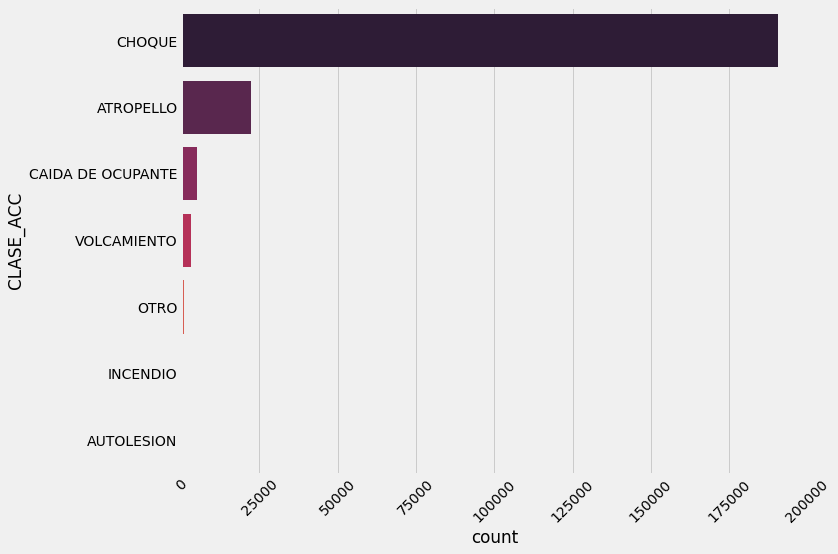

In [218]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    sns.countplot(y='CLASE_ACC', data=train_sigma,
                order=train_sigma['CLASE_ACC'].value_counts().index,  palette='rocket')
    ax.tick_params(axis='x', rotation=45)


<p>Which incidents are most frequently dealt with by each "LOCALIDAD"?</p>
<p>This can be made clearer by showing the localidades as location points on the map</p>

In [219]:
cross_tab_train = pd.crosstab(
    train_sigma['CLASE_ACC'], train_sigma['LOCALIDAD'])


In [220]:
cross_tab_train.style.background_gradient(
    cmap='mako_r', text_color_threshold=0.02)


In [221]:
stack_sigma_list = cross_tab_train.stack().reset_index().rename(columns= {0:'value'})

From numerical visualization to visualization with bar plots. It is important to do both, so that we can diversify our knowledge.

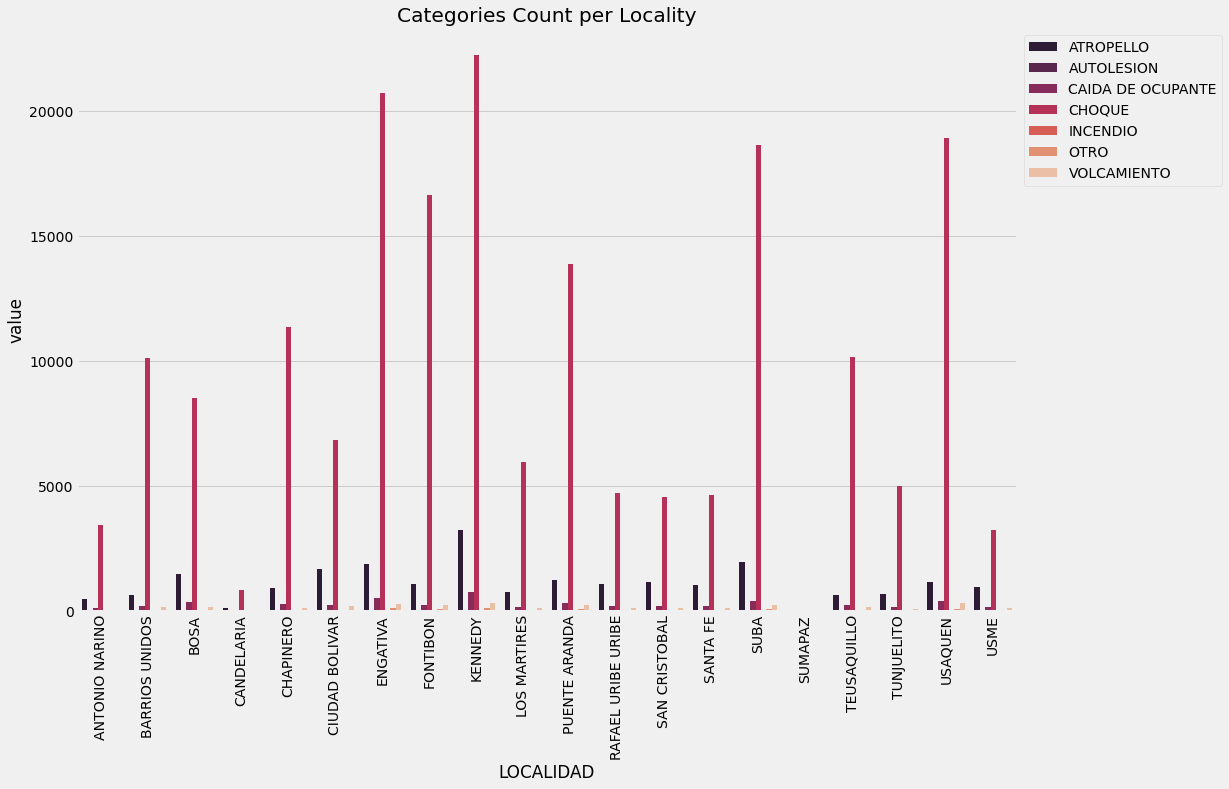

In [272]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    sns.barplot(x=stack_sigma_list['LOCALIDAD'], y=stack_sigma_list['value'],
                hue=stack_sigma_list['CLASE_ACC'],  palette='rocket')
    ax.set_title('Categories Count per Locality')
    ax.tick_params(axis='x', rotation=90)
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')


In [246]:
cross_tab_train_2 = pd.crosstab(
    train_sigma['GRAVEDAD'], train_sigma['LOCALIDAD'])


In [247]:
cross_tab_train_2.style.background_gradient(
    cmap='mako_r', text_color_threshold=0.02)


In [248]:
stack_sigma_list_2 = cross_tab_train_2.stack().reset_index().rename(columns= {0:'value'})

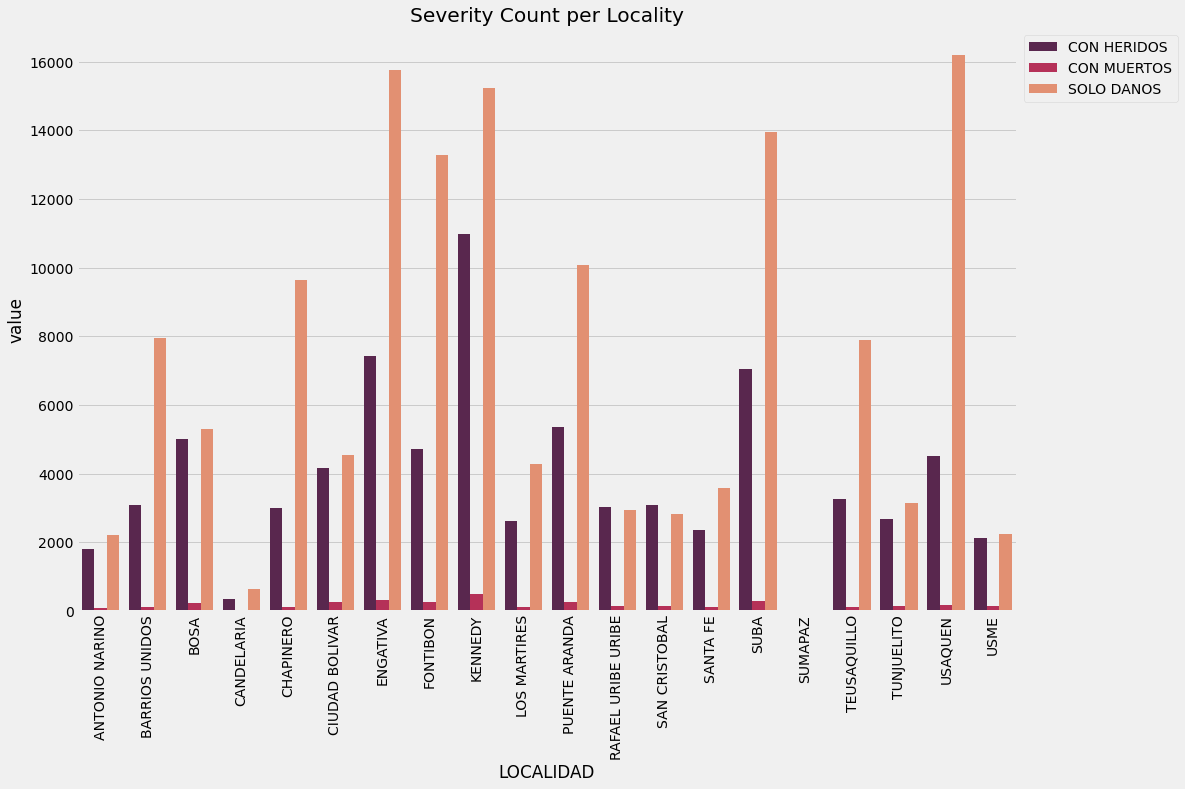

In [271]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    sns.barplot(x=stack_sigma_list_2['LOCALIDAD'], y=stack_sigma_list_2['value'],
                hue=stack_sigma_list_2['GRAVEDAD'],  palette='rocket')
    ax.set_title('Severity Count per Locality')
    ax.tick_params(axis='x', rotation=90)
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')


In [257]:
cross_tab_train_3 = pd.crosstab(
    train_sigma['ANO_OCURRENCIA_ACC'], train_sigma['LOCALIDAD'])


In [252]:
cross_tab_train_3.style.background_gradient(
    cmap='mako_r', text_color_threshold=0.02)


In [253]:
stack_sigma_list_3 = cross_tab_train_3.stack().reset_index().rename(columns= {0:'value'})

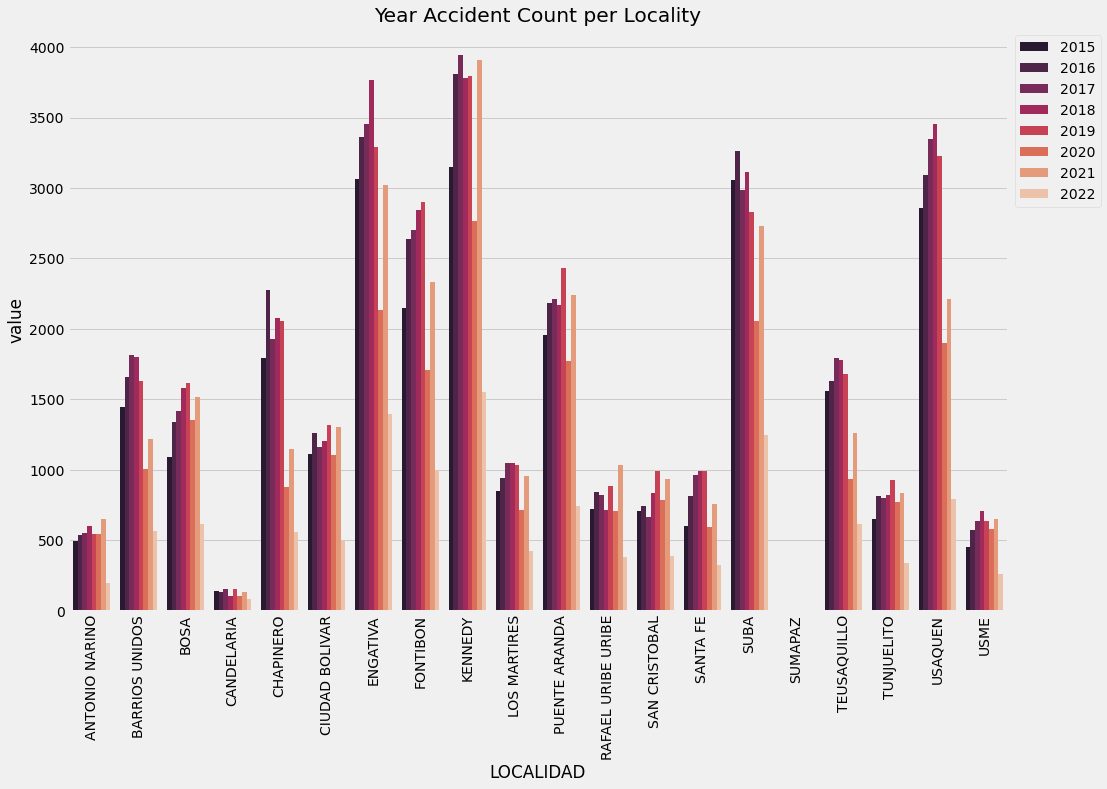

In [270]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    sns.barplot(x=stack_sigma_list_3['LOCALIDAD'], y=stack_sigma_list_3['value'],
                hue=stack_sigma_list_3['ANO_OCURRENCIA_ACC'],  palette='rocket')
    ax.set_title('Year Accident Count per Locality')
    ax.tick_params(axis='x', rotation=90)
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')


In [256]:
cross_tab_train_4 = pd.crosstab(
    train_sigma['MES_OCURRENCIA_ACC'], train_sigma['LOCALIDAD'])


In [258]:
cross_tab_train_4.style.background_gradient(
    cmap='mako_r', text_color_threshold=0.02)


In [259]:
stack_sigma_list_4 = cross_tab_train_4.stack().reset_index().rename(columns= {0:'value'})

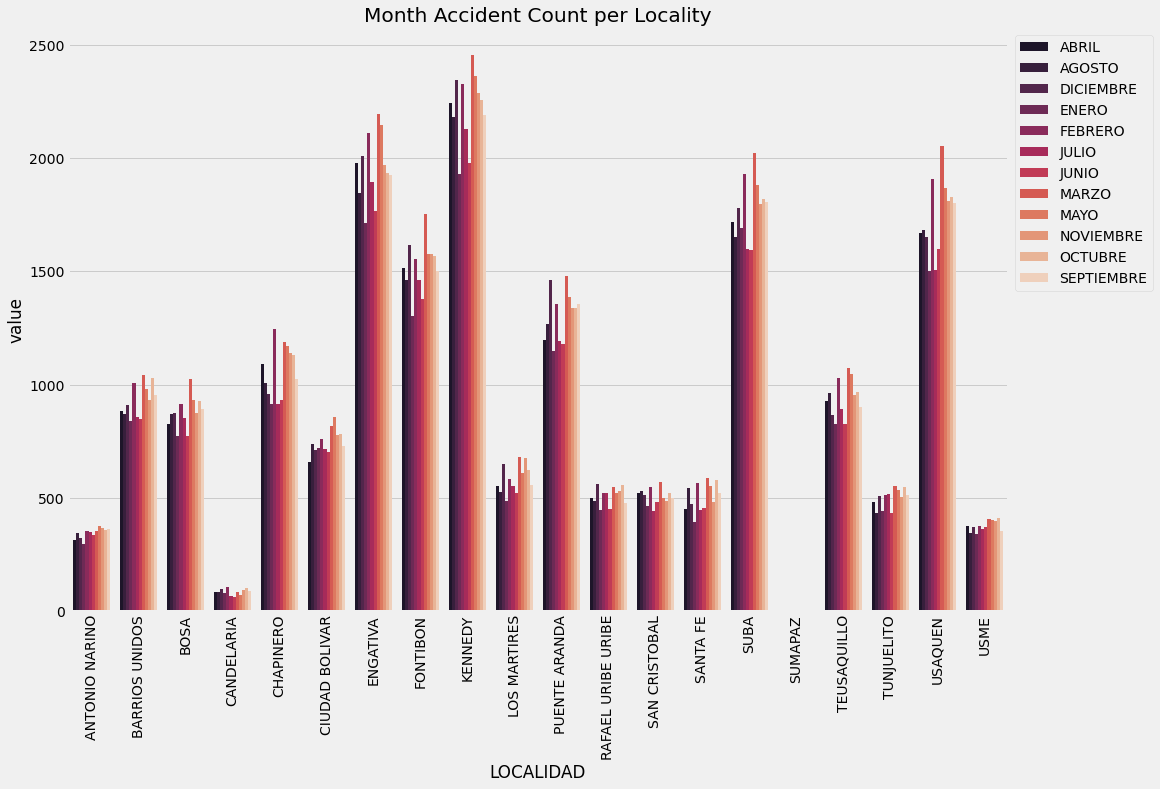

In [269]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    sns.barplot(x=stack_sigma_list_4['LOCALIDAD'], y=stack_sigma_list_4['value'],
                hue=stack_sigma_list_4['MES_OCURRENCIA_ACC'],  palette='rocket')
    ax.set_title('Month Accident Count per Locality')
    ax.tick_params(axis='x', rotation=90)
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')


<h3>Conclusions</h3>
<ul>
    <li>An analysis about car accidents in Bogota city during the last seven years has been done.</li>
    <li>Data shows that the biggest kind of car accident it's crash, followed by run over.</li>
    <li>The majority of the cases the final result of the car crash implies only material damages.</li>
    <li>The locality with highest rate of car accidents is Kenedy, followed by Engativa, and the locality with the lowest car accidents inside the urban perimeter is La Candelaria.</li>
    <li>Analyzing the amount of accidents per month, the data shows that March it's the month with the highest car accidents over all the localities.</li>
    <li>2020 shows a reduction in the car accidents, however, Kenedy's locality continues being the area with the highest accidents.</li>
    <li>Looking at the geo-spatial map, we may see that car accidents resulting whit dead people or hurt people occurs around the city, with a few small bright spots.</li>
</ul>

<h3>Future Tasks</h3>
<ul>
    <li>Try to find if there are clusters of car accidents around the city.</li>
    <li>Right now, the city it's having a lot of construction, so the conditions are changing, but we can try to do some ML in order to predict and prevent the car accidents around the city.</li>
    <li>Make more data analysis to understand the reasons why Kenedy is the locality with the highest rate of car accidents.</li>
</ul>